# 1.  confusion matrix ,   precision,   recall

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

In [3]:
y [digits.target==9] = 1
y[digits.target!=9] = 0

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6)

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9844444444444445

In [6]:
y_log_predict = log_reg.predict(X_test)

In [7]:
# True Negnative
def TN(y_true,y_predict):
    return np.sum((y_true==0)&(y_predict==0))
# True Positive 
def TP(y_true,y_predict):
    return np.sum((y_true==1)&(y_predict==1))
#False Positive
def FP(y_true,y_predict):
    return np.sum((y_true==0)&(y_predict==1))
# False Negtive 
def FN(y_true,y_predict):
    return np.sum((y_true==1)&(y_predict==0))

In [8]:
TN(y_test,y_log_predict)

411

In [9]:
"""
predict   0   1
Real  0  TN   FP
      1  FN   TP
"""
def confusion_martix(y_true,y_predict):
    return np.array([[TN(y_true,y_predict),FP(y_true,y_predict)],[FN(y_true,y_predict),TP(y_true,y_predict)]])

In [10]:
confusion_martix(y_test,y_log_predict)

array([[411,   4],
       [  3,  32]])

In [11]:
#  The ratio of true positive to  positive preticted
def precision_score(y_true,y_predict):
    return TP(y_true,y_predict)/(TP(y_true,y_predict)+FP(y_true,y_predict))
    

In [12]:
precision_score(y_test,y_log_predict)

0.8888888888888888

In [13]:
# The ratio of true positive to real positive
def recall_score(y_true,y_predict):
    try:
        return TP(y_true,y_predict)/(TP(y_true,y_predict)+FN(y_true,y_predict))
    except:
        return 0.0


In [14]:
recall_score(y_test,y_log_predict)

0.9142857142857143

# confusion matrix ,   precision,   recall in scikit-learn 

In [15]:
from sklearn.metrics import confusion_matrix
confusion_martix(y_test,y_log_predict)

array([[411,   4],
       [  3,  32]])

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test,y_log_predict)

0.8888888888888888

In [17]:
from sklearn.metrics import recall_score
recall_score(y_test,y_log_predict)

0.9142857142857143

# Understanding of precision and recall

> We can use the precision to evaluate a stock price forecast model. The precision indicates how many of the results predicted as rising are correct.

> When establishing a model to diagnose illness, we can use recall to evaluate the quality of the model. Because we want to predict more people who are really sick as much as possible. Therefore, the higher the recall score, the better the model.

In [18]:
#问题： 预测股票是涨还是跌，实用精准率，做的决策股票回升里有多少是对的，比例越高越好

#问题：病人诊断，使用召回率，病人的预测覆盖率，不漏掉任何病人

# 2. F1 score: balance of recall and precision
# F1 score: 同时顾及召回率和精准率，调和平均值

## 1/F1 = 1/2*(1/precision + 1/recall)

> If one of them is high,the other one is low, F1 is low. Only when they are both high, F1 score can be high

In [19]:
# 如果二者极度不平衡，F1也会十分低。 只有同时高，F1score才会高

## F1 = 2*precision*recall/(precision+recall)   (0,1]

##  F1 score in python 

In [20]:
def f1_score(precision,recall):
    try:
        return 2*precision*recall/(precision+recall)
    except:
        return 0.0

In [21]:
f1_score(precision_score(y_test,y_log_predict),recall_score(y_test,y_log_predict))

0.9014084507042254

##  f1 score in scikit-learn 

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test,y_log_predict)

0.9014084507042254

# blance between precision-recall

> In logistic regression, the formula:  1/(1+ e**-(M*X)),threshold is eta.   
Actually, when M*X >= eta1, y* = 1, M*X < eta1, y* = 0. eta1 = -log(1/eta -1)

> when eta1 increases, recall decreases and precision  increases.

>when eta1 decreases, recall increases , precision will increase.

> when eta1 is very very high,  recall will tend to 0 , precision will tend to 1.

In [23]:
# 阈值增大，召回率降低，精准率增大。阈值减小，召回率增加，精准率江少

In [41]:
descision_score = log_reg.predict_proba(X_test)[:,1]

In [42]:
np.max(descision_score)

0.9999999924813404

In [43]:
np.min(descision_score)

9.146425458320899e-26

In [44]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
descision_score

array([3.03792140e-04, 9.98048596e-01, 7.97471259e-12, 2.34627998e-14,
       6.14715089e-11, 1.60595318e-05, 2.72853199e-06, 6.72803319e-08,
       1.42993145e-17, 2.71426087e-13, 9.24144951e-01, 1.82725413e-17,
       5.93743069e-19, 6.11152129e-14, 4.67950456e-06, 3.96922063e-06,
       1.80685790e-05, 9.70984823e-09, 3.63049101e-11, 2.27686636e-09,
       3.37834284e-11, 4.58266470e-13, 8.99870605e-13, 1.43242750e-10,
       8.02375071e-07, 5.70445425e-20, 4.28032111e-11, 1.56329275e-12,
       2.10467464e-06, 1.63567542e-10, 9.01171260e-13, 1.70044759e-12,
       2.79701821e-07, 1.98551217e-03, 1.16367170e-05, 1.73692154e-22,
       9.01328033e-19, 2.05863957e-14, 4.75525614e-14, 1.74829767e-04,
       2.41799224e-05, 2.73445824e-22, 3.02594820e-13, 3.99848489e-09,
       2.33098241e-08, 6.98429690e-09, 5.55193068e-18, 1.40847770e-01,
       2.64680447e-15, 1.01040040e-18, 1.21502068e-19, 8.78974579e-14,
       3.27424551e-17, 1.03731112e-14, 5.94260522e-18, 1.08361170e-17,
      

In [46]:
y_predict_2 = np.array(descision_score>=0.5,dtype='int')

In [47]:
confusion_martix(y_test,y_predict_2)

array([[411,   4],
       [  3,  32]])

In [48]:
recall_score(y_test,y_predict_2)

0.9142857142857143

In [49]:
precision_score(y_test,y_predict_2)

0.8888888888888888

# 3. Precision_score & Recall_score curve

> When the threshold between maxmize and minmize value of desicion, we calculate the recall score and the precision scall.

In [50]:
import  matplotlib.pyplot as plt
thresholds = np.arange(np.min(descision_score),np.max(descision_score),0.1)
precisions = []
recalls = []
for thre in thresholds:
    y_predict = np.array(descision_score>=thre,dtype='int')
    precisions.append(precision_score(y_test,y_predict))
    recalls.append(recall_score(y_test,y_predict))

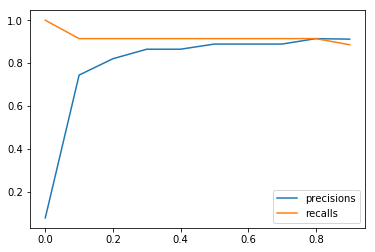

In [51]:
plt.plot(thresholds,precisions,label = 'precisions')
plt.plot(thresholds,recalls,label = 'recalls')
plt.legend()
plt.show()

> The thresold of the crossover point maybe the best threshold .

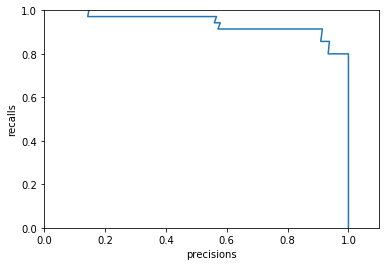

In [63]:
plt.plot(precisions,recalls)
plt.xlabel('precisions')
plt.ylabel('recalls')
plt.axis([0,1.1,0,1])
plt.show()

> The thresold on the sharp drop point is the best position for balance.  
>If the recall can stay high before the sharp drop, that's when the thresold is high ,TP is still high, it means the model is good.
> So the sharper the drop , the better the model.  



In [64]:
## 急剧下降的点是平衡的最好位置

##  precision_recall curve in  scikit-learn 

In [65]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thres = precision_recall_curve(y_test,descision_score)

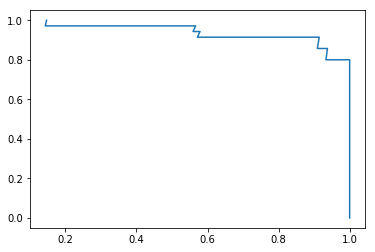

In [66]:
plt.plot(precisions,recalls)

In [67]:
# 曲线下的面积越大模型越好

# 4.  ROC curve and AUC
> ROC describes the relationship between TPR and FPR.

## TPR = recall   
## FPR = FP/(TN+FP)  = 1- N_recall   

> When the thresold increase, TPR decreases，N_recall increases, FPR decreases 

> when the thresold is high enough, TP is very low and FP will be very low , recall and  FPR will be very low . 

>when the thresold is low enough, TP is very high and FP will be very high , recall and  FPR will be very high . 

In [68]:
def TPR(y_test,y_predict):
    return recall_score(y_test,y_predict)

def FPR(y_test,y_predict):
    fp = FP(y_test,y_predict)
    tn = TN(y_test,y_predict)
    fp = FP(y_test,y_predict)
    try:
        return fp/(tn+fp)
    except:
        return 0.0

In [69]:
fprs = []
tprs = []
for thre in thresholds:
    y_predict = np.array(descision_score>=thre,dtype='int')
    fprs.append(FPR(y_test,y_predict))
    tprs.append(TPR(y_test,y_predict))

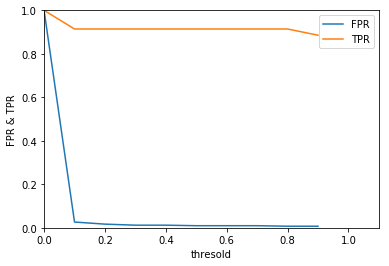

In [72]:
plt.plot(thresholds,fprs,label='FPR')
plt.plot(thresholds,tprs,label='TPR')
plt.legend()
plt.xlabel('thresold')
plt.ylabel('FPR & TPR')
plt.axis([0,1.1,0,1])
plt.show()

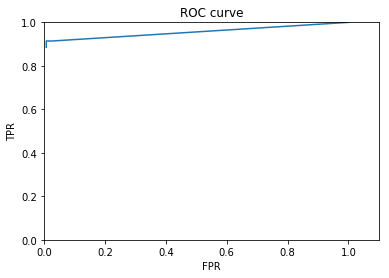

In [73]:
plt.plot(fprs,tprs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.axis([0,1.1,0,1])
plt.title('ROC curve')
plt.show()

> This means when the thresold is very low, the TPR will equals to 1, FPR will also equals to 1. When the thresold is very high, the TPR equals to 0, the FPR equals to 0. But before the thresold became the maxmize, the FPR is very low, the TPR is still high, that's means even the thresold is high, we can predict enough patients, which indicates this is a very good model. The prediction score of True positive peoplev are all very high.

## ROC curve  in scikit-learn 

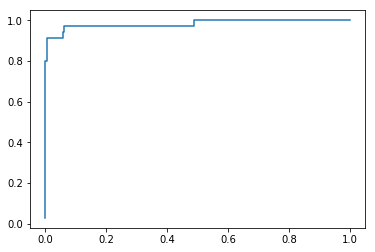

In [74]:
from sklearn.metrics import roc_curve
fprs,tprs,thresholds = roc_curve(y_test,descision_score)
plt.plot(fprs,tprs)
plt.show()

In [75]:
#面积越大越好，FPR越小，错误预测为1的概率越小，召回率越高，这样表明模型越好


## AUC : Area under ROC curve 
> The maxmize value of ROC is 1, the large AUC, the better the model.  
> When FPR is small and TPR became very large , it means the model can predict the true positive correctly.

## ROC curve  in scikit-learn 

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,descision_score)

0.9818932874354561

# 5. Lift  and Lift Chart

## Lift

> pi1 = (TP+FN)/(TP+FP+TN+FN)

> Lift = precision/pi1

> Lift measures how much better the predictive power of the model is compared with the model without using it. Such as we send mails to 1000 people and we expect 200 will send reply back. This The ratio of positive cases is 0.2. If use one model, the model predict 100 will response and send the mail to this 100 people, a fews days later, there are 70 people really reponse to us. Then the precision is 0.7. The lift is 3.5. That's means the reply rate was improved 250%.

## Lift using Python

In [77]:
def pi1(y_test,y_predict):
    try:
        return (TP(y_test,y_predict)+FN(y_test,y_predict))/(TP(y_test,y_predict)+FN(y_test,y_predict)+TN(y_test,y_predict)+FP(y_test,y_predict))
    except:
        return 0.0
    
def lift_score(y_test,y_predict):
    try:
        return precision_score(y_test,y_predict)/pi1(y_test,y_predict)
    except:
        return 0.0

In [78]:
lifts = []
depth = []
for thre in thresholds:
    y_predict = np.array(descision_score>=thre,dtype='int')
    lifts.append(lift_score(y_test,y_predict))

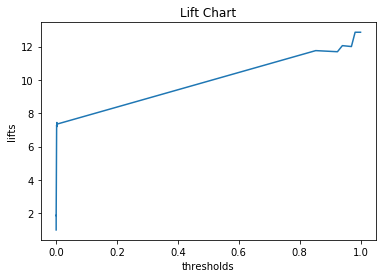

In [79]:
plt.plot(thresholds,lifts)
plt.xlabel('thresholds')
plt.ylabel('lifts')
plt.title('Lift Chart')
plt.show()

## Lift Chart

> depth = (TP+FP)/(TP+FP+TN+FN)  

> Proportion of predicted positive cases

In [80]:
def depth(y_test,y_predict):
    try:
        return (TP(y_test,y_predict)+FP(y_test,y_predict))/(TP(y_test,y_predict)+FP(y_test,y_predict)+TN(y_test,y_predict)+FN(y_test,y_predict))
    except:
        return 0.0

In [81]:
thresholds = np.linspace(np.min(descision_score),np.max(descision_score),10)
lifts = []
depths = []
for thre in thresholds:
    y_predict = np.array(descision_score>=thre,dtype='int')
    lifts.append(lift_score(y_test,y_predict))
    depths.append(depth(y_test,y_predict))

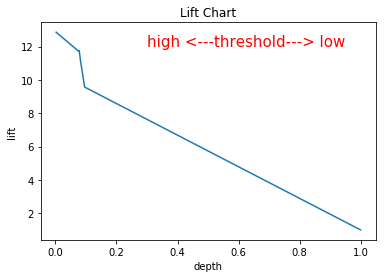

In [82]:
plt.plot(depths,lifts)
plt.xlabel('depth')
plt.ylabel('lift')

plt.text(0.3,12,'high <---threshold---> low', ha='left', wrap=True,fontsize=15,color='red')
plt.title('Lift Chart')
plt.show()

> As the threshold decreases, more customers will be classified as positive, that is, the depth (the proportion predicted to be positive) increases. When the threshold is set large enough, only a small part of the observed values will be normalized, but this small part (a handful) must be the most positive set of observed values (in the case of database marketing above, this part of the population responds most actively to the mailing questionnaire), so under this depth, the corresponding lift value Maximum.

>Similarly, when the threshold is set sufficiently small, almost all observations are classified as positive (depth is almost 1) - when the effect of classification is similar to that of random classfication, the corresponding lift value is close to 1.

> Lift chart can be understood as: We sorted all 1000 people according to the predict score.If we send mail to the first 10% people the lift is 12.8.If we send mail to the first 50% people, lift is 2.8. If we send mail to all 1000 people, the lift is 1, which means the model doesn't work.

# Gain  and Gain Chart

## Gain
> Gain = PV+ = lift*pi1 = TP/(TP+FN)

In [83]:
def gain_score(y_test,y_predict):
     try:
        return precision_score(y_test,y_predict)
     except:
        return 0.0

## Gain Chart 

In [84]:
thresholds = np.linspace(np.min(descision_score),np.max(descision_score),10)
gains = []
depths = []
for thre in thresholds:
    y_predict = np.array(descision_score>=thre,dtype='int')
    gains.append(gain_score(y_test,y_predict))
    depths.append(depth(y_test,y_predict))

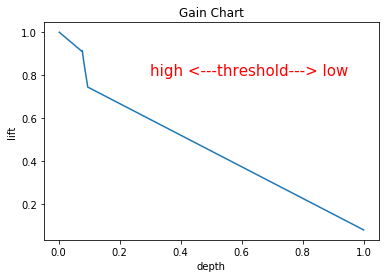

In [85]:
plt.plot(depths,gains)
plt.xlabel('depth')
plt.ylabel('lift')
plt.text(0.3,0.8,'high <---threshold---> low', ha='left', wrap=True,fontsize=15,color='red')
plt.title('Gain Chart')
plt.show()

# 6. KS  and KS curve

> KS = TPR - FPR

In [86]:
def KS_score(y_test,y_predict):
    try:
        return TPR(y_test,y_predict)-FPR(y_test,y_predict)
    except:
        return 0.0

In [87]:
thresholds = np.linspace(np.min(descision_score),np.max(descision_score),10)
KSs = []
TPRs = []
FPRs = []
for thre in thresholds:
    y_predict = np.array(descision_score>=thre,dtype='int')
    KSs.append(KS_score(y_test,y_predict))
    FPRs.append(FPR(y_test,y_predict))
    TPRs.append(TPR(y_test,y_predict))
    

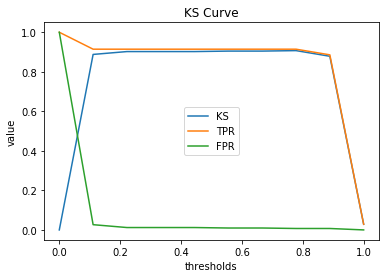

In [88]:
plt.plot(thresholds,KSs,label='KS')
plt.plot(thresholds,TPRs,label='TPR')
plt.plot(thresholds,FPRs,label='FPR')
plt.xlabel('thresholds')
plt.ylabel('value')
plt.title('KS Curve')
plt.legend()
plt.show()

> On the point which has the maxmize KS value, the best has a high TPR and a low FPR. Thos means that the model using this threshod will predict patients correctly and won't predict normal people as patients.

# 7. deciles

> Deciles is to sort a group of data from small to large (or from large to small), then divide all data into 10 equal parts with 9 points. The values corresponding to the positions of these nine points are called deciles, which are recorded as D1, D2,... D9 indicates that 10% of the data falls below D1 and 20% of the data falls below D2. 90% of the data falls below D9.

In [199]:
def deciles_score(y_score,decile=5):
    result = pd.DataFrame(data={'score':y_score})
    s_e = pd.DataFrame()
    s_e['decile_score'] =result.groupby(pd.qcut(result.score, decile))['score'].mean().values
    s_e = s_e.sort_index(ascending=False).reset_index().drop(columns = ['index'])
    return s_e

In [200]:
print(deciles_score(descision_score,5))

   decile_score
0  4.112216e-01
1  3.447357e-06
2  1.127888e-08
3  4.275470e-12
4  2.520751e-16


# 8. Score VS  Event plot

In [201]:
def Score_EventScore(y_test,y_score,decile=5):
    result = pd.DataFrame(data={'score':y_score,'event':y_test})
    s_e = pd.DataFrame()
    s_e['decile_score'] =result.groupby(pd.qcut(result.score, decile))['score'].mean().values
    s_e['event_score'] =result.groupby(pd.qcut(result.score, decile))['event'].mean().values
    # s_e = s_e.sort_index(by='decile_score',ascending=False)
    s_e = s_e.sort_index(ascending=False).reset_index().drop(columns = ['index'])
    return s_e

In [202]:
def plot_Score_EventScore(s_e):
    plt.plot(s_e['decile_score'],marker = 'o',color='red',label='decile_score')
    plt.plot(s_e['event_score'],marker = 'o',color='blue',label='event_score')
    plt.legend()
    plt.show()

In [203]:
s_e = Score_EventScore(y_test,descision_score)
print(s_e)

   decile_score  event_score
0  4.112216e-01     0.066667
1  3.447357e-06     0.088889
2  1.127888e-08     0.111111
3  4.275470e-12     0.100000
4  2.520751e-16     0.022222


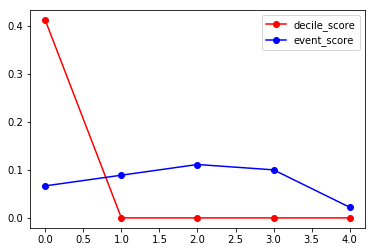

In [204]:
plot_Score_EventScore(s_e)

# 多分类问题中的混淆矩阵

In [96]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)
y_log_predict = log_reg.predict(X_test)

In [97]:
from sklearn.metrics import precision_score
precision_score(y_test,y_log_predict,average='micro')

0.9533333333333334

In [100]:
confusion_martix(y_test,y_log_predict)

array([[52,  0],
       [ 0, 38]])

In [103]:
y_test

array([1, 9, 6, 0, 8, 5, 7, 8, 4, 2, 7, 6, 2, 6, 0, 7, 4, 3, 1, 3, 7, 2,
       2, 2, 0, 6, 2, 6, 5, 0, 0, 2, 7, 3, 5, 6, 6, 7, 6, 5, 7, 6, 2, 8,
       2, 7, 4, 7, 6, 6, 6, 1, 6, 6, 6, 4, 1, 2, 0, 2, 4, 3, 4, 0, 4, 7,
       5, 4, 1, 9, 5, 0, 4, 1, 0, 0, 5, 8, 3, 0, 0, 2, 8, 0, 8, 1, 4, 0,
       8, 2, 9, 9, 1, 1, 5, 8, 4, 5, 4, 6, 0, 4, 9, 1, 1, 4, 7, 1, 6, 7,
       5, 4, 5, 0, 5, 4, 3, 6, 4, 0, 1, 4, 5, 5, 3, 1, 2, 1, 1, 0, 7, 9,
       1, 4, 9, 6, 9, 4, 9, 8, 7, 4, 4, 6, 6, 2, 3, 9, 3, 7, 3, 5, 3, 8,
       5, 1, 2, 1, 1, 8, 8, 2, 6, 9, 0, 5, 3, 3, 5, 7, 7, 1, 4, 8, 3, 0,
       4, 7, 6, 5, 0, 1, 2, 4, 9, 9, 4, 2, 2, 8, 5, 3, 2, 9, 0, 4, 8, 2,
       3, 4, 4, 0, 5, 7, 0, 2, 3, 9, 2, 1, 8, 5, 7, 8, 7, 3, 0, 2, 9, 7,
       7, 7, 0, 0, 2, 4, 2, 4, 8, 7, 0, 6, 2, 0, 2, 2, 9, 2, 5, 7, 5, 6,
       0, 5, 6, 5, 3, 0, 9, 6, 2, 5, 2, 4, 3, 7, 4, 1, 9, 2, 3, 3, 1, 9,
       8, 9, 3, 3, 5, 2, 4, 1, 8, 2, 5, 9, 6, 0, 7, 4, 4, 8, 2, 0, 9, 8,
       5, 3, 7, 9, 0, 5, 7, 2, 1, 6, 5, 8, 1, 3, 1,

In [104]:
from sklearn.metrics import confusion_matrix as cm
cfm = cm(y_test,y_log_predict)

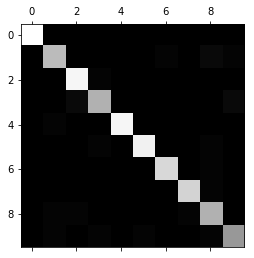

In [105]:
plt.matshow(cfm,cmap = plt.cm.gray)
plt.show()

In [106]:
row_sums = np.sum(cfm,axis=1)
error_matrics = cfm/row_sums
np.fill_diagonal(error_matrics,0)

In [107]:
error_matrics

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02222222, 0.        , 0.05128205, 0.02857143],
       [0.        , 0.        , 0.        , 0.025     , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.03921569, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05714286],
       [0.        , 0.02380952, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.025     , 0.        ,
        0.        , 0.        , 0.        , 0.02564103, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02564103, 0.        ],
       [0.        , 0.        , 0.       

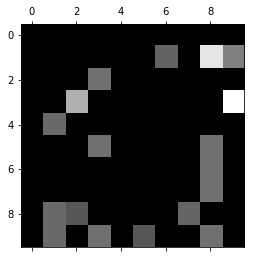

In [108]:
plt.matshow(error_matrics,cmap = plt.cm.gray)
plt.show()